In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import gensim
import string
import re

C:\Users\Gaurav\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
# read .txt file line by line, split by tab(\t)
list_data=[]
with open('C:\\Users\\Gaurav\\Desktop\\ISI forms\\Project\\il5_uromo.txt',encoding='utf8',errors='ignore') as fp:
    for line in fp:
        list_data.append(line.split('\t'))
    
    
    

In [5]:
# name the columns of datframe
raw_data = pd.DataFrame(list_data,columns=['doc_id','text_data','class_type']) 

In [6]:
# strip columns for leading and trailing white spaces
raw_data['doc_id']=raw_data.doc_id.str.strip()
raw_data['text_data']=raw_data.text_data.str.strip()
raw_data['class_type']=raw_data['class_type'].str.strip()

In [7]:
raw_data.shape

(4969, 3)

In [8]:
# set doc_id as index
raw_data= raw_data.set_index('doc_id')
# change "class_type" column to categorical datatype
raw_data['class_type'] = raw_data['class_type'].astype('category')

In [9]:
# http links removal on 'text_data' column

# regex : ((http|https)://t.co/[a-zA-Z0-9]+)

raw_data['text_data'] = raw_data['text_data'].apply(lambda x: re.sub('((http|https)://t.co/[a-zA-Z0-9]+)','',x))
raw_data.shape

(4969, 2)

In [10]:
# RT (Retweet Removal)

raw_data['text_data'] = raw_data['text_data'].apply(lambda x: re.sub('RT','',x))
raw_data.shape

(4969, 2)

In [11]:
# Date Removal

#raw_data.loc['IL6_SN_000370_20161004_H0T0060XN','text_data']

In [12]:
#punctuation removal on 'text_data' column
#print(string.punctuation)
punct='!"$%&()*+,-./:;<=>?[\]^_`{|}~'+"'"
#print(punct)
regex = re.compile('[%s]' % re.escape(punct))

raw_data['text_data'] = raw_data['text_data'].apply(lambda x: regex.sub('', x))
raw_data['text_data']=raw_data.text_data.str.strip()
raw_data.shape

(4969, 2)

In [13]:
# remove @names

raw_data['text_data'] = raw_data['text_data'].apply(lambda x: re.sub('\@[a-zA-Z0-9]+','',x))
raw_data.shape

(4969, 2)

In [14]:
raw_data['length'] = raw_data['text_data'].apply(lambda x: len(x.split()))
# sort by file length
raw_data=raw_data.sort_values(by='length', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [15]:
raw_data = raw_data.loc[raw_data.length>0]
raw_data.head(5)

,text_data,class_type,length
doc_id,,,
IL5_SN_000370_20160327_G0T000FF5,#BernieMadeMeWhite,unk,1
IL5_SN_000370_20170210_H0T0036XJ,#Eritrea,unk,1
IL5_SN_000370_20150606_G0T000DLF,https,unk,1
IL5_SN_000370_20151120_G0T000FJI,#weneedstandforBayush,unk,1
IL5_SN_000370_20170426_H0T0068OB,#JusticeForEritrea,unk,1


In [16]:
# remove emoji's

raw_data['text_data'] = raw_data['text_data'].apply(lambda x: re.sub('["\U0001F600-\U0001F64F" "\U0001F300-\U0001F5FF" "\U0001F680-\U0001F6FF"  "\U0001F1E0-\U0001F1FF"]+',' ',x))

# strip whitespaces again 


raw_data['text_data']=raw_data.text_data.str.strip()
raw_data['class_type']=raw_data['class_type'].str.strip()

# calculate length again
raw_data['length'] = raw_data['text_data'].apply(lambda x: len(x.split()))
# sort by file length
raw_data=raw_data.sort_values(by='length', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [17]:
raw_data = raw_data.loc[raw_data.length>5]
raw_data.head(5)

,text_data,class_type,length
doc_id,,,
IL5_SN_000370_20170427_H0T0068P2,Documentary Ethiopia’s Tedros Adhanom incompet...,unk,6
IL5_SN_000370_20151015_G0T000CJZ,calciatori eritrei chiedono asilo in #Botswana,unk,6
IL5_SN_000370_20160117_G0T000AYO,Deutsch Lernen Lesen Hören Teil 2,unk,6
IL5_SN_000370_20170523_H0T0068Y8,#wha70 #NextDG #Africa #Ethiopia #WHODG #WHO,unk,6
IL5_SN_000370_20161116_H0T0067RB,#Russia Quits International Criminal Court ICC,unk,6


In [18]:
raw_data['text_data'] = raw_data['text_data'].apply(lambda x: x.lower())

In [19]:
#raw_data.loc['IL6_SN_000370_20160730_H0T00606Q']

unk              3147
nondomain         823
indomain          466
eval_incident     160
Name: class_type, dtype: int64


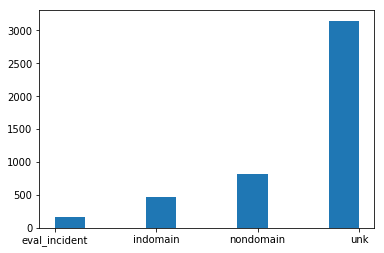

In [20]:
print(raw_data.class_type.value_counts())
plt.hist('class_type',data=raw_data)
plt.show()

In [21]:
# write the formatted data to a new text file for reference
#print(raw_data.to_csv(sep='\t', index=False, header=True)) 
reset_data=raw_data.reset_index()
reset_data.to_csv('C:\\Users\\Gaurav\\Desktop\\ISI forms\\Project\\il5_data__preprocess_hashtag_emojis_length.txt', header=True, index=False, sep='\t', mode='w',encoding='utf-8')


In [22]:
count =raw_data.length.value_counts()
count = count.reset_index()

In [23]:
count=count.rename(index=str, columns={'index':'Document Length','length':'Occurances'})
count=count.sort_values(by='Occurances', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

less_than_thirty = count.loc[count['Document Length']<=30,'Occurances'].sum()

print("total records: ", len(raw_data.index))

print("less than 30 characters: ", less_than_thirty)

total records:  4596
less than 30 characters:  3528


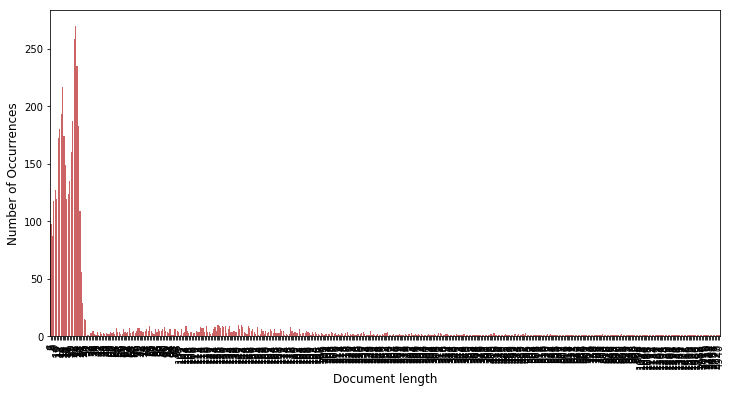

In [24]:
# document length  histogram 
import seaborn as sns
color = sns.color_palette()
count =raw_data.length.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index, count.values, alpha=0.8,color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Document length', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()